In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
Max=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
month=np.arange(12)

df=pd.DataFrame(data={'Max':Max,'Min':Min})

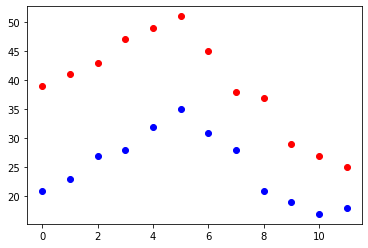

In [3]:
plt.plot(month,Max,'ro')
plt.plot(month,Min,'bo')

In [30]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max)
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min)

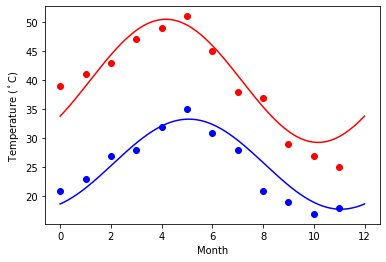

In [31]:
days=np.linspace(0,12,num=365)
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [32]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df=pd.read_csv(url)

In [33]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [41]:
df.groupby('sex')['sex'].count()

sex
female    466
male      843
Name: sex, dtype: int64

In [44]:
female_count=df.groupby('sex')['sex'].count()[0]
male_count=df.groupby('sex')['sex'].count()[1]

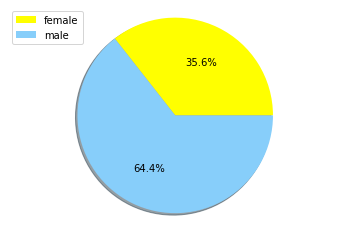

In [57]:
label=['female','male']
size=[466,843]
colors=['yellow', 'lightskyblue']
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.legend(label)


<Figure size 720x432 with 0 Axes>

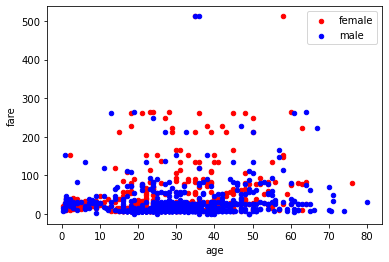

In [112]:
plt.figure(figsize=(10,6))
ax=df[df['sex']=='female'].plot.scatter('age','fare',color='red',label='female')
df[df['sex']=='male'].plot.scatter('age','fare',color='blue',label='male',ax=ax)

